In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("crime_data.csv")
df = data.copy()
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Lets understand the Data first

In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Lets rename first column for better understanding in future

In [7]:
df.rename(columns={"Unnamed: 0": "States"}, inplace = True)

Lets plot the data to get more insights

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_8399/1640560710.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax , alpha = 0.5)


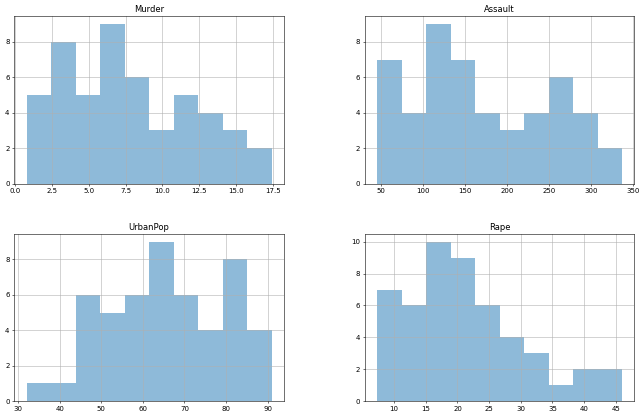

In [9]:
fig, ax = plt.subplots(figsize = (16,10), dpi = 50)
df.hist(ax = ax , alpha = 0.5)
plt.show()

### Lets check do we need to apply any transformation or not

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


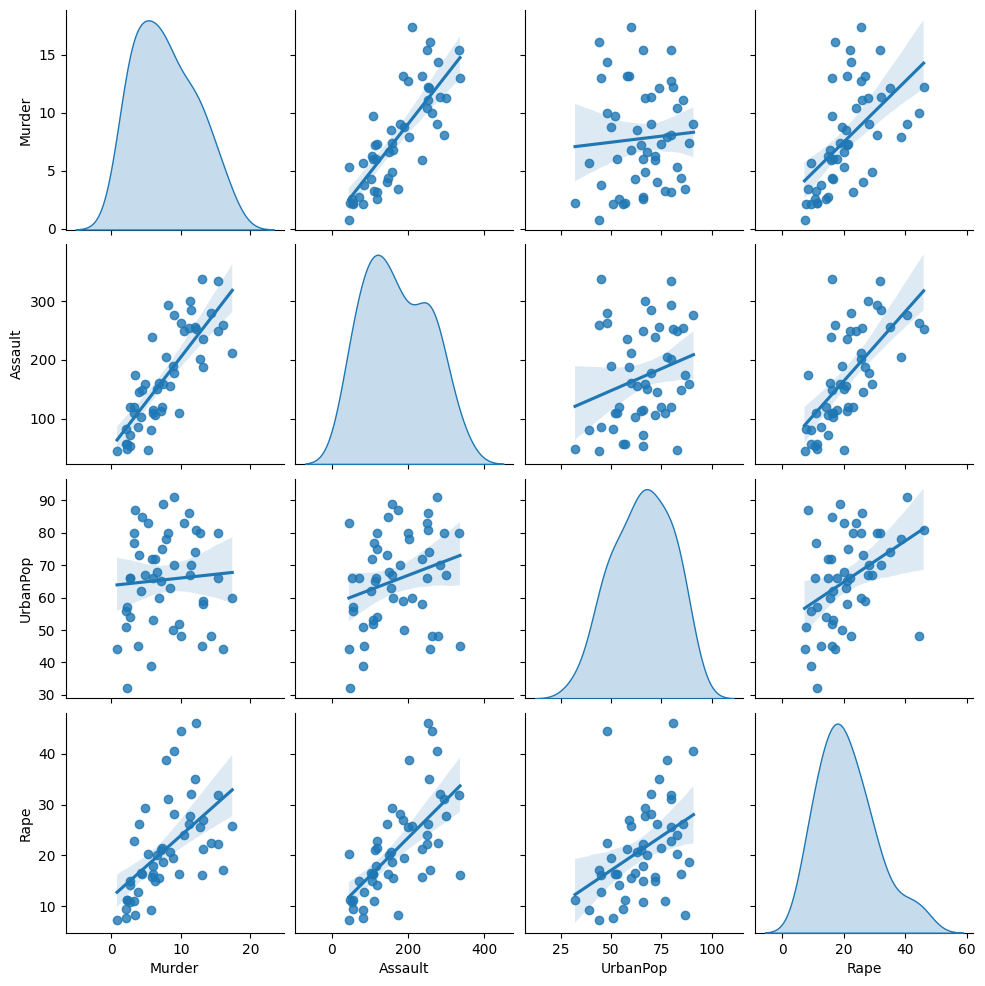

In [10]:
sns.pairplot(df, kind= 'reg', diag_kind='kde')

Applying log transformation

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


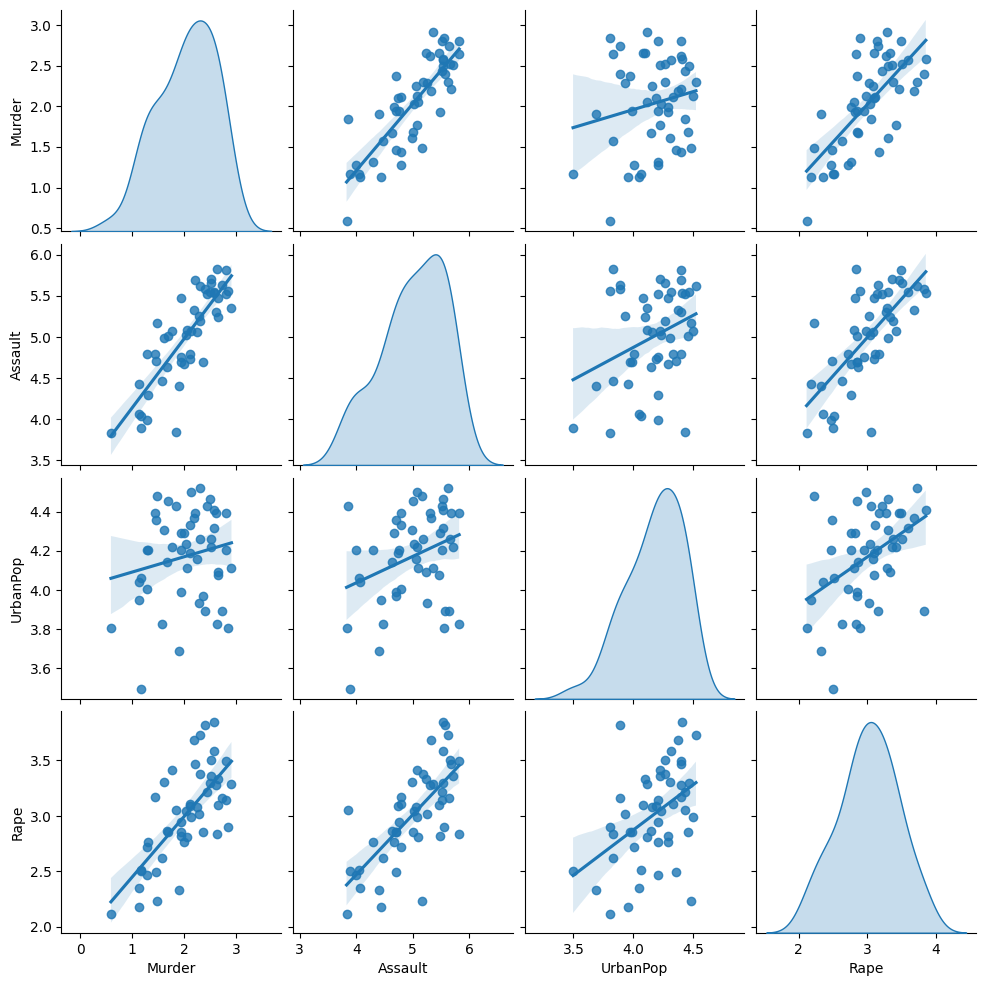

In [11]:
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

# Apply square root transformation to numerical columns
df_sqrt_transformed = df.copy()
df_sqrt_transformed[numerical_cols] = df[numerical_cols].apply(lambda x: np.log(x+1))

# Create pairplot with regression plots and kernel density estimates
sns.pairplot(df_sqrt_transformed, kind="reg", diag_kind="kde")


no the log transformation doesn't feel effective enough

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


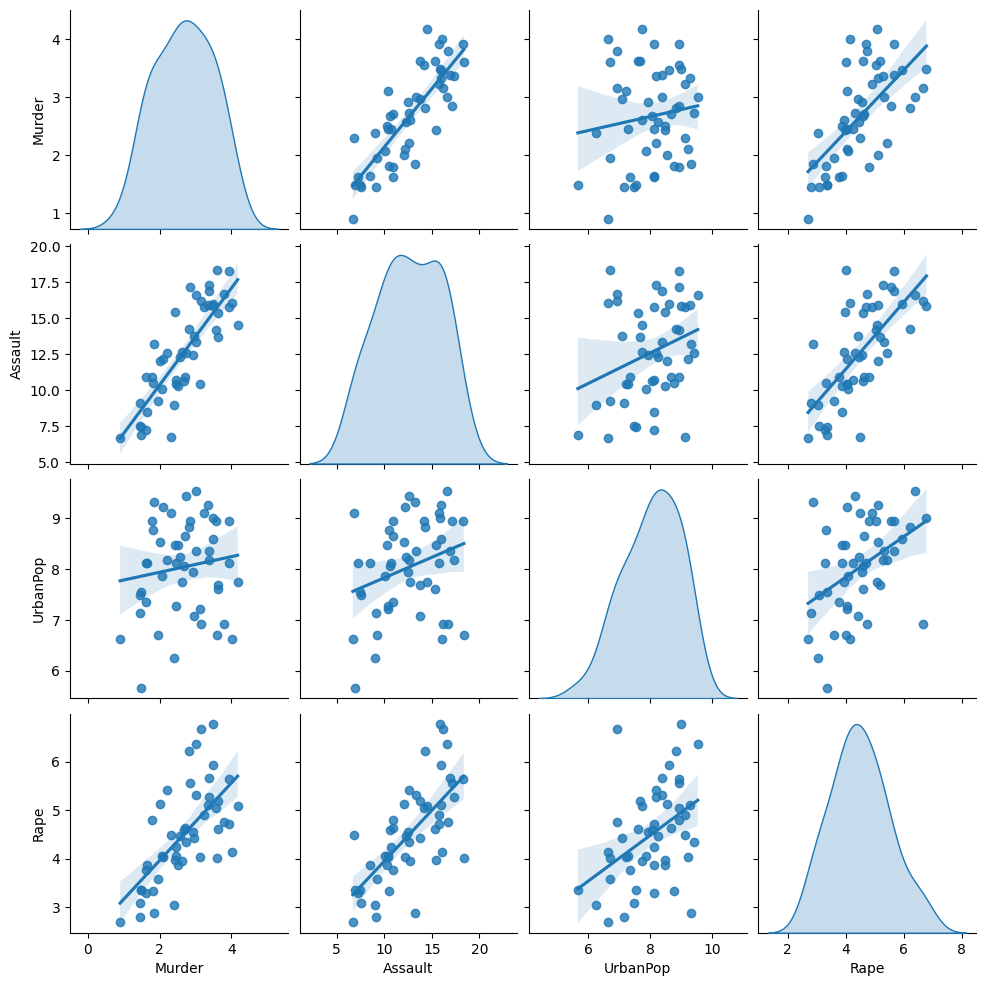

In [12]:
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

# Apply square root transformation to numerical columns
df_sqrt_transformed = df.copy()
df_sqrt_transformed[numerical_cols] = df[numerical_cols].apply(lambda x: np.sqrt(x))

# Create pairplot with regression plots and kernel density estimates
sns.pairplot(df_sqrt_transformed, kind="reg", diag_kind="kde")


sqrt was able to make it look like a normal bell shaped curve

### Lets check for Outliers

#### one at a time

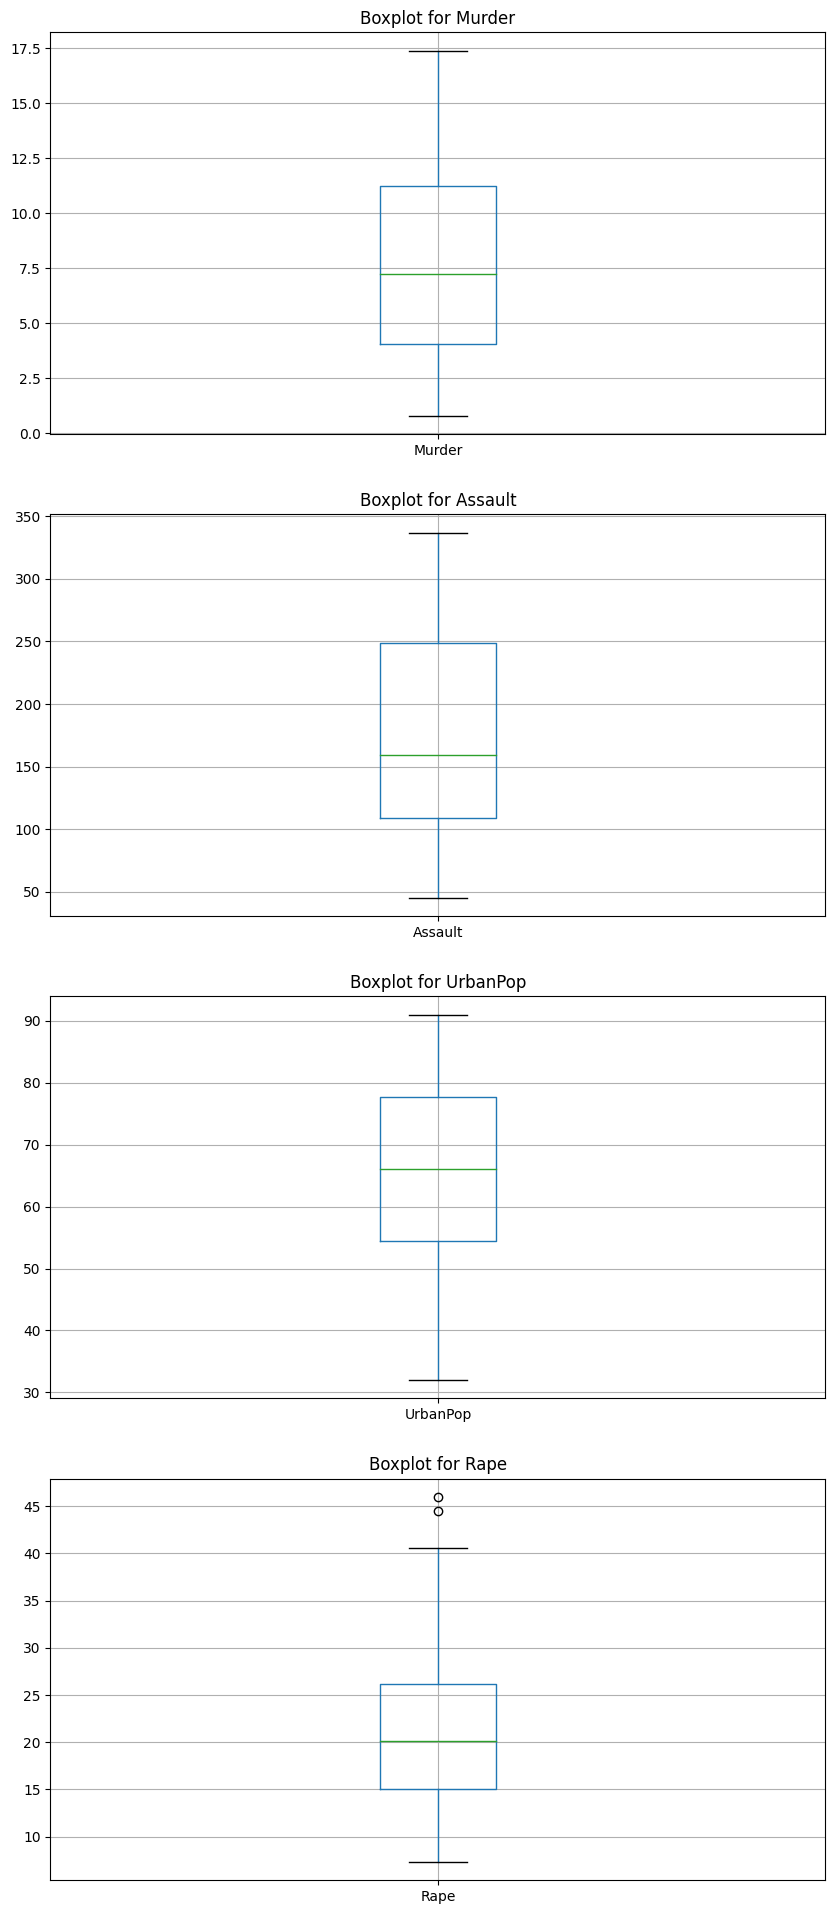

In [13]:
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 6 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()

so it is clearly visible that only the rape category has got an outlier

#### on same scale

<Axes: >

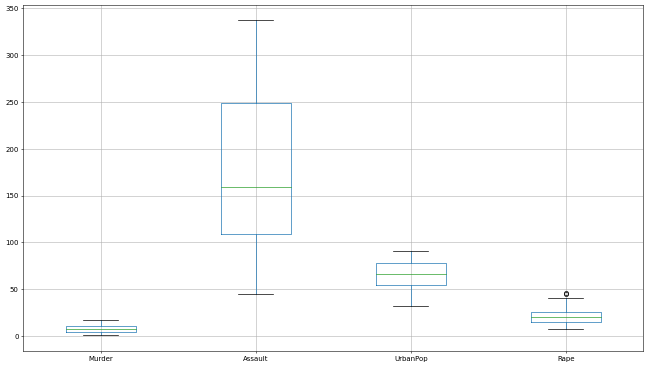

In [14]:
plt.subplots(figsize = (16,9), dpi = 50)
df.boxplot()

lets transform the data with sqrt and then continue it

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
con_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]


In [17]:
con_cols

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [18]:
cat_cols

['States']

lets apply sqrt transformation to the continuous columns in the dataframe

In [19]:
dfSqrt = df.copy()
dfSqrt[con_cols] = df[con_cols].apply(lambda x: np.sqrt(x))

In [20]:
dfSqrt

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,3.633180,15.362291,7.615773,4.604346
1,Alaska,3.162278,16.217275,6.928203,6.670832
2,Arizona,2.846050,17.146428,8.944272,5.567764
3,Arkansas,2.966479,13.784049,7.071068,4.415880
4,California,3.000000,16.613248,9.539392,6.371813
5,Colorado,2.810694,14.282857,8.831761,6.220932
6,Connecticut,1.816590,10.488088,8.774964,3.331666
7,Delaware,2.428992,15.427249,8.485281,3.974921
8,Florida,3.924283,18.303005,8.944272,5.648008
9,Georgia,4.171331,14.525839,7.745967,5.079370


### Lets scale the data

In [21]:
con_cols

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

dfSqrt[con_cols] = sc.fit_transform(dfSqrt[con_cols])



In [23]:
dfSqrt = dfSqrt.set_index("States")

In [24]:
from sklearn.cluster import KMeans
wss = []
for i in range(2,16):
    km = KMeans(n_clusters=i)
    km.fit(dfSqrt.iloc[:,1:]) # Because in the question it has been asked to take only top 3 PCA's.
    wss.append(km.inertia_)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

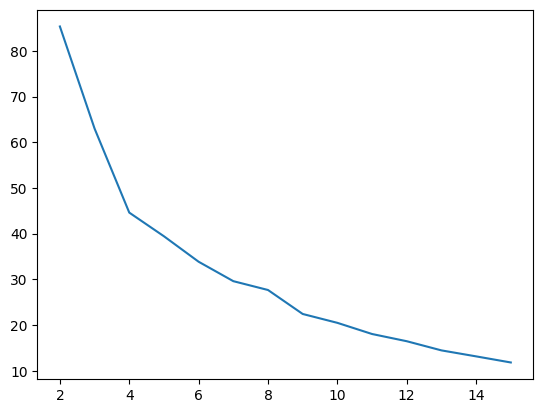

In [25]:
plt.plot(range(2,16),wss)

Seems to me that 4 is the optimum number of clusters

### Lets Build the Model with the information acquired till now

In [26]:
km  = KMeans(n_clusters= 4, random_state=42)
cluster_pred = km.fit_predict(dfSqrt)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
cluster_pred

array([1, 1, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 3, 1, 0, 2, 3, 2,
       0, 1, 2, 3, 3, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [28]:
dfKmeans = dfSqrt.copy()

In [29]:
dfKmeans["Cluster"] = cluster_pred

Adding 1 to all cluster numbers because lets be real here 'cluster 0' naah, seems a bit odd.

In [30]:
dfKmeans["Cluster"] = dfKmeans["Cluster"].apply(lambda x: x+1)

In [31]:
dfKmeans

,Murder,Assault,UrbanPop,Rape,Cluster
States,,,,,
Alabama,1.191064,0.825024,-0.470119,0.105167,2
Alaska,0.607966,1.084703,-1.224569,2.192878,2
Arizona,0.216395,1.366910,0.987602,1.078481,3
Arkansas,0.365517,0.345672,-1.067808,-0.085234,2
California,0.407024,1.204970,1.640610,1.890787,3
Colorado,0.172615,0.497173,0.864147,1.738357,3
Connecticut,-1.058340,-0.655392,0.801826,-1.180584,4
Delaware,-0.300030,0.844753,0.483966,-0.530722,4
Florida,1.551524,1.718190,0.987602,1.159549,3


### Hierarchical Clustering

In [32]:
import scipy.cluster.hierarchy as sch

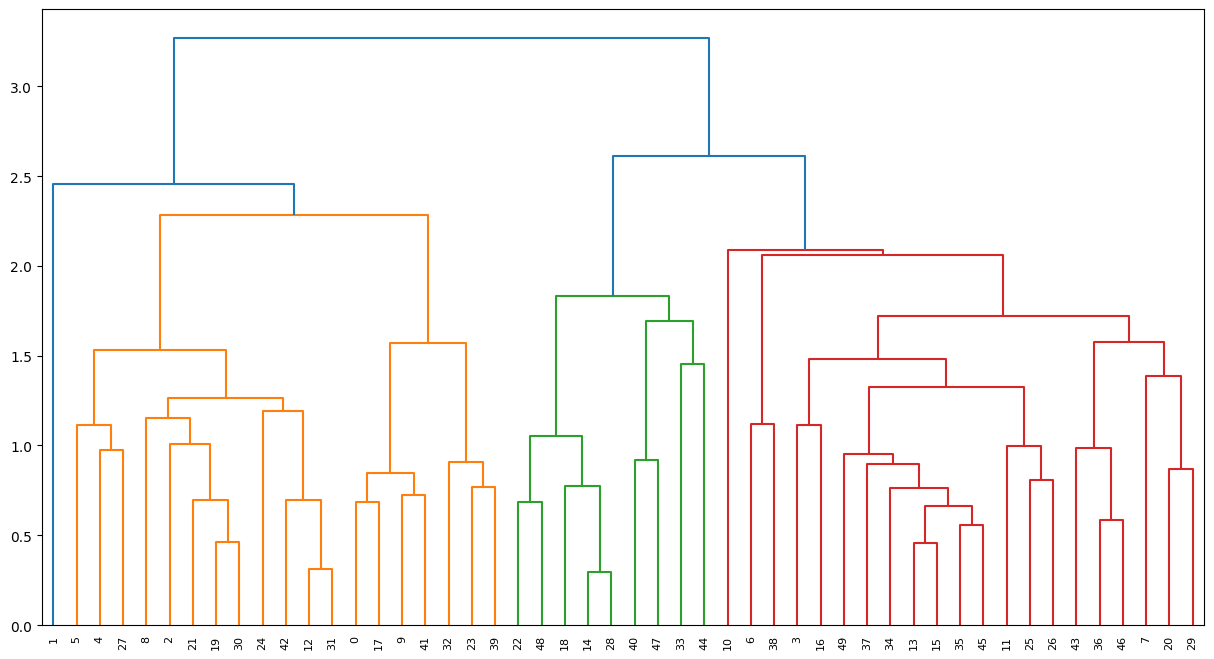

In [33]:
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(dfSqrt, method ="average"))

The path was long and unforgiving but we seem to have found solace in 4 clusters as this also hints towards the same.

In [34]:
from sklearn.cluster import AgglomerativeClustering
 

In [35]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [36]:
dfSqrt

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,1.191064,0.825024,-0.470119,0.105167
Alaska,0.607966,1.084703,-1.224569,2.192878
Arizona,0.216395,1.366910,0.987602,1.078481
Arkansas,0.365517,0.345672,-1.067808,-0.085234
California,0.407024,1.204970,1.640610,1.890787
Colorado,0.172615,0.497173,0.864147,1.738357
Connecticut,-1.058340,-0.655392,0.801826,-1.180584
Delaware,-0.300030,0.844753,0.483966,-0.530722
Florida,1.551524,1.718190,0.987602,1.159549


In [37]:
cluster_pred2 = hc1.fit_predict(dfSqrt)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
dfHier = dfSqrt.copy()
dfHier["Cluster"] = cluster_pred2

In [39]:
dfHier["Cluster"] = dfHier["Cluster"].apply(lambda x :x+1)
dfHier

,Murder,Assault,UrbanPop,Rape,Cluster
States,,,,,
Alabama,1.191064,0.825024,-0.470119,0.105167,1
Alaska,0.607966,1.084703,-1.224569,2.192878,4
Arizona,0.216395,1.366910,0.987602,1.078481,1
Arkansas,0.365517,0.345672,-1.067808,-0.085234,2
California,0.407024,1.204970,1.640610,1.890787,1
Colorado,0.172615,0.497173,0.864147,1.738357,1
Connecticut,-1.058340,-0.655392,0.801826,-1.180584,2
Delaware,-0.300030,0.844753,0.483966,-0.530722,2
Florida,1.551524,1.718190,0.987602,1.159549,1


Let us apply DBSCAN now and end this once and for all

### DBSCAN

In [40]:
dfDB = dfSqrt.copy()

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.9, min_samples= 3)
db.fit(dfDB)

DBSCAN(eps=0.9, min_samples=3)

In [47]:
cluster_pred3 = db.labels_

In [48]:
cluster_pred3

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  2,  2,  2,  2,
        0,  2,  3, -1,  3,  2,  0, -1,  2,  2, -1,  2, -1,  3,  1,  0, -1,
        2,  2,  4,  2, -1,  0, -1,  0,  1,  4, -1,  2,  4, -1,  2,  2])

In [49]:
dfDB["Cluster"] = cluster_pred3 

In [50]:
dfDB["Cluster"] = dfDB["Cluster"].apply(lambda x: x+2)

In [51]:
dfDB

,Murder,Assault,UrbanPop,Rape,Cluster
States,,,,,
Alabama,1.191064,0.825024,-0.470119,0.105167,2
Alaska,0.607966,1.084703,-1.224569,2.192878,1
Arizona,0.216395,1.366910,0.987602,1.078481,1
Arkansas,0.365517,0.345672,-1.067808,-0.085234,1
California,0.407024,1.204970,1.640610,1.890787,1
Colorado,0.172615,0.497173,0.864147,1.738357,1
Connecticut,-1.058340,-0.655392,0.801826,-1.180584,1
Delaware,-0.300030,0.844753,0.483966,-0.530722,1
Florida,1.551524,1.718190,0.987602,1.159549,1


And its over... **BEGONE**